In [50]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
radar_df = pd.read_csv(f"../data/processed data/radar_data.csv")
clean_radar_df = radar_df[radar_df["QPDH0"] == 0.25]
q_radar_df = radar_df[radar_df["HasQuality"] == 1.0]
q_clean_radar_df = clean_radar_df[radar_df["HasQuality"] == 1.0]
lidar_df = pd.read_csv(f"../data/processed data/lidar_data.csv")

/var/folders/wg/2xl73lps6v94ylh3_1s4dtzh0000gn/T/ipykernel_29396/96047960.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q_clean_radar_df = clean_radar_df[radar_df["HasQuality"] == 1.0]


In [52]:
clean_keys_cnt = {k: Counter(clean_radar_df[k]) for k in radar_df.keys()}
keys_cnt = {k: Counter(radar_df[k]) for k in radar_df.keys()}
q_clean_keys_cnt = {k: Counter(q_clean_radar_df[k]) for k in q_radar_df.keys()}
q_keys_cnt = {k: Counter(q_radar_df[k]) for k in q_radar_df.keys()}

q_clean_keys_cnt = {
    k: Counter(clean_radar_df[radar_df["HasQuality"] == 1.0][k])
    for k in clean_radar_df.keys()
}
q_keys_cnt = {
    k: Counter(radar_df[radar_df["HasQuality"] == 1.0][k]) for k in radar_df.keys()
}

for key, val in clean_keys_cnt.items():
    print(
        key,
        len(val),
        len(keys_cnt[key]),
        len(q_clean_keys_cnt[key]),
        len(q_keys_cnt[key]),
    )

/var/folders/wg/2xl73lps6v94ylh3_1s4dtzh0000gn/T/ipykernel_29396/1878252302.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k: Counter(clean_radar_df[radar_df["HasQuality"] == 1.0][k])
/var/folders/wg/2xl73lps6v94ylh3_1s4dtzh0000gn/T/ipykernel_29396/1878252302.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k: Counter(clean_radar_df[radar_df["HasQuality"] == 1.0][k])
/var/folders/wg/2xl73lps6v94ylh3_1s4dtzh0000gn/T/ipykernel_29396/1878252302.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k: Counter(clean_radar_df[radar_df["HasQuality"] == 1.0][k])
/var/folders/wg/2xl73lps6v94ylh3_1s4dtzh0000gn/T/ipykernel_29396/1878252302.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  k: Counter(clean_radar_df[radar_df["HasQuality"] == 1.0][k])
/var/folders/wg/2xl73lps6v94ylh3_1s4dtzh0000gn/T/ipykernel_29396/1878252302.py:7: UserWarning: Boolean Series key wi

X, (m) 354557 633602 354557 549309
Y, (m) 354568 633620 354568 549327
Z, (m) 1 1 1 1
AbsoluteRadialVelocity 303645 498492 303645 452100
RadarCrossSection 118 140 118 130
RelativeRadialVelocity 312530 529146 312530 469254
RelativeLateralVelocity 184 203 184 203
Range 2 2 2 2
DistanceAccuracy 2 2 2 2
AngleAccuracy 77284 89576 77284 84067
DynProp 7 7 7 7
HasQuality 1 2 1 1
QPDH0 1 84696 1 3
QDistLongRMS 10 84703 10 10
QDistLatRMS 9 84703 9 10
QVLongRMS 9 84702 9 9
QVLatRMS 1 84694 1 1
QAmbigState 3 4 3 3
QInvalidState 1 6 1 5
(radar_point_ts - lidar_ts), (s) 13364 13370 13364 13366
radar_idx 5 5 5 5
X_RAW, (m) 353141 628793 353141 546007
Y_RAW, (m) 353449 630117 353449 546754


In [53]:
grid = True

/var/folders/wg/2xl73lps6v94ylh3_1s4dtzh0000gn/T/ipykernel_29396/1608999732.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(clean_radar_df[np.abs(radar_df[key]) >= 0.0][key], bins=100, alpha=0.5)
/var/folders/wg/2xl73lps6v94ylh3_1s4dtzh0000gn/T/ipykernel_29396/1608999732.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(clean_radar_df[np.abs(radar_df[key]) < 1][key], bins=100, alpha=0.5)
/var/folders/wg/2xl73lps6v94ylh3_1s4dtzh0000gn/T/ipykernel_29396/1608999732.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(clean_radar_df[np.abs(radar_df[key]) > 1][key], bins=100, alpha=0.5)


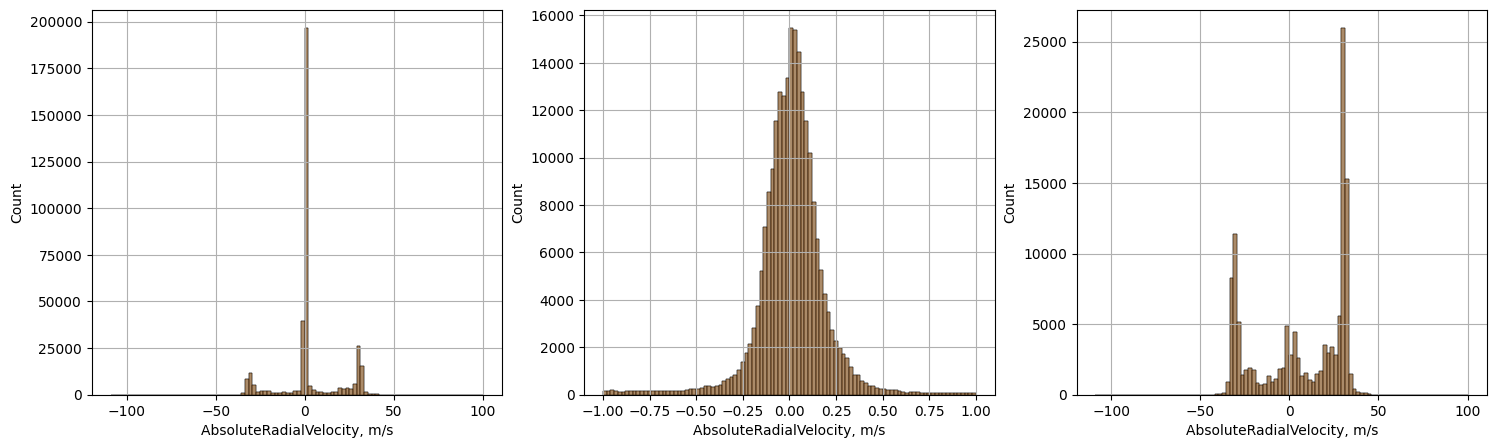

In [76]:
key = "AbsoluteRadialVelocity"
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(clean_radar_df[np.abs(clean_radar_df[key]) >= 0.0][key], bins=100)
sns.histplot(clean_radar_df[np.abs(radar_df[key]) >= 0.0][key], bins=100, alpha=0.5)
plt.xlabel('AbsoluteRadialVelocity, m/s')
plt.grid(grid)
plt.subplot(1, 3, 2)
sns.histplot(clean_radar_df[np.abs(clean_radar_df[key]) < 1][key], bins=100)
sns.histplot(clean_radar_df[np.abs(radar_df[key]) < 1][key], bins=100, alpha=0.5)
plt.xlabel('AbsoluteRadialVelocity, m/s')
plt.grid(grid)
plt.subplot(1, 3, 3)
sns.histplot(clean_radar_df[np.abs(clean_radar_df[key]) > 1][key], bins=100)
sns.histplot(clean_radar_df[np.abs(radar_df[key]) > 1][key], bins=100, alpha=0.5)
plt.xlabel('AbsoluteRadialVelocity, m/s')
plt.grid(grid)

140 118


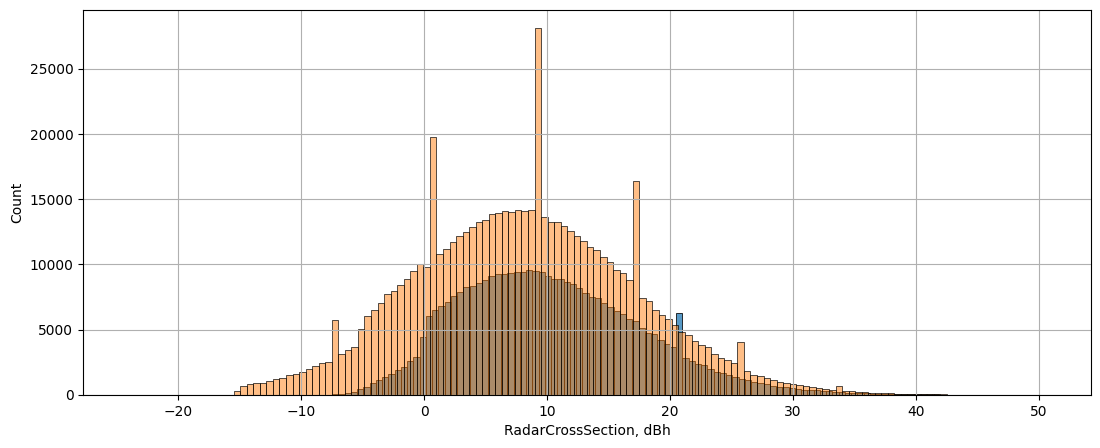

In [77]:
key = "RadarCrossSection"
plt.figure(figsize=(13, 5))
sns.histplot(clean_radar_df[key], bins=118)
sns.histplot(radar_df[key], bins=140, alpha=0.5)
plt.xlabel("RadarCrossSection, dBh")
plt.grid(grid)
print(len(keys_cnt[key]), len(clean_keys_cnt[key]))

/var/folders/wg/2xl73lps6v94ylh3_1s4dtzh0000gn/T/ipykernel_29396/1360387281.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(clean_radar_df[np.abs(radar_df[key]) >= 0.0][key], bins=100, alpha=0.5)
/var/folders/wg/2xl73lps6v94ylh3_1s4dtzh0000gn/T/ipykernel_29396/1360387281.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(clean_radar_df[np.abs(radar_df[key]) < 50][key], bins=100, alpha=0.5)
/var/folders/wg/2xl73lps6v94ylh3_1s4dtzh0000gn/T/ipykernel_29396/1360387281.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(clean_radar_df[np.abs(radar_df[key] + 20) < 10][key], bins=100, alpha=0.5)


529146 312530


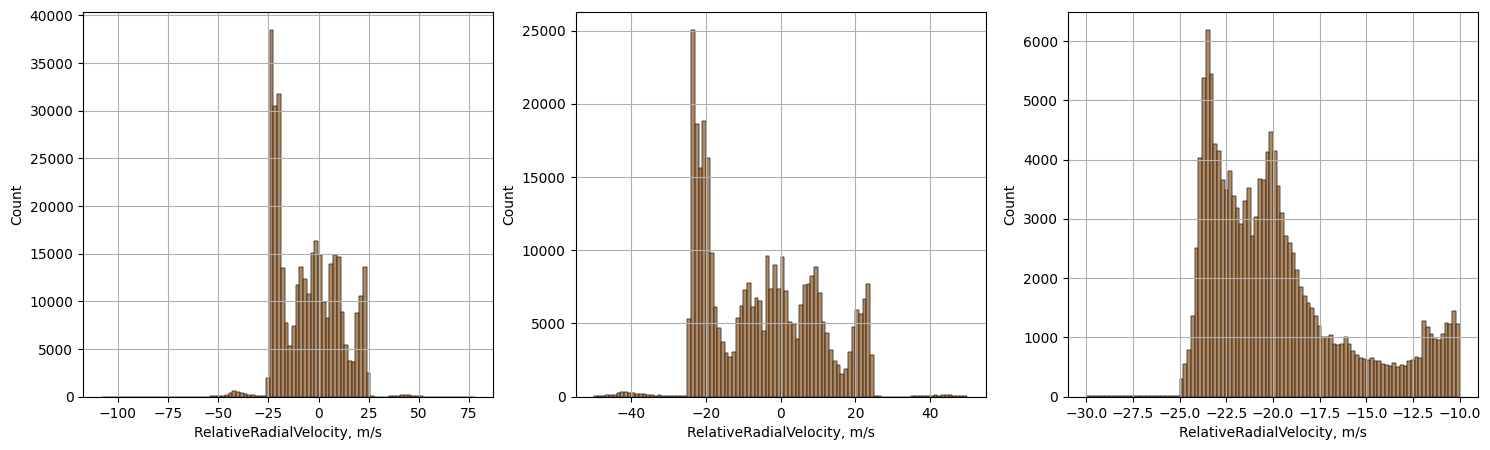

In [78]:
key = "RelativeRadialVelocity"
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(clean_radar_df[np.abs(clean_radar_df[key]) >= 0.0][key], bins=100)
sns.histplot(clean_radar_df[np.abs(radar_df[key]) >= 0.0][key], bins=100, alpha=0.5)
plt.xlabel("RelativeRadialVelocity, m/s")
plt.grid(grid)
plt.subplot(1, 3, 2)
sns.histplot(clean_radar_df[np.abs(clean_radar_df[key]) < 50][key], bins=100)
sns.histplot(clean_radar_df[np.abs(radar_df[key]) < 50][key], bins=100, alpha=0.5)
plt.xlabel("RelativeRadialVelocity, m/s")
plt.grid(grid)
plt.subplot(1, 3, 3)
sns.histplot(clean_radar_df[np.abs(clean_radar_df[key] + 20) < 10][key], bins=100)
sns.histplot(clean_radar_df[np.abs(radar_df[key] + 20) < 10][key], bins=100, alpha=0.5)
plt.xlabel("RelativeRadialVelocity, m/s")
plt.grid(grid)
print(len(keys_cnt[key]), len(clean_keys_cnt[key]))

203 184


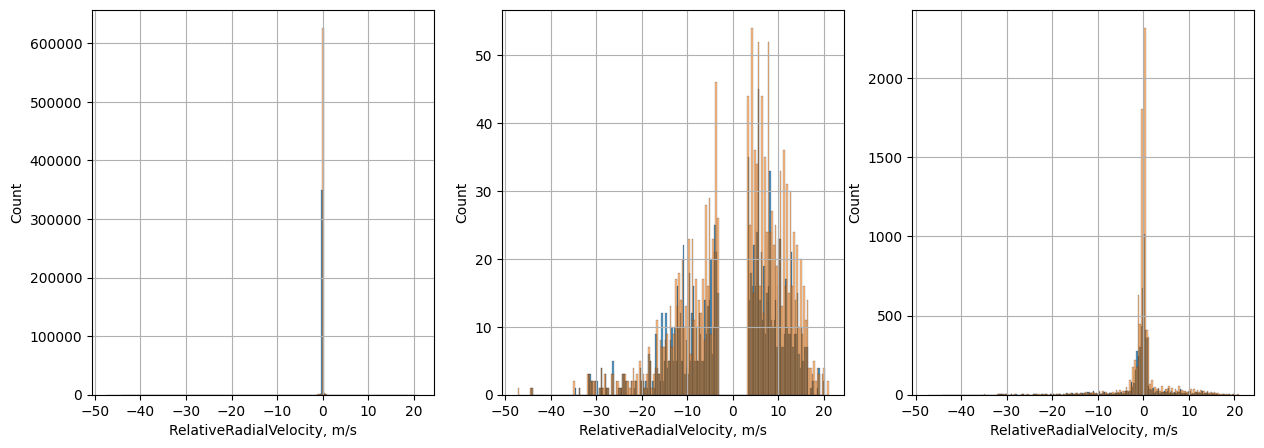

In [79]:
key = "RelativeLateralVelocity"
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(clean_radar_df[key], bins=203)
sns.histplot(radar_df[key], bins=184, alpha=0.5)
plt.xlabel("RelativeRadialVelocity, m/s")
plt.grid(grid)
plt.subplot(1, 3, 2)
sns.histplot(clean_radar_df[np.abs(clean_radar_df[key]) > 3][key], bins=203)
sns.histplot(radar_df[np.abs(radar_df[key]) > 3][key], bins=184, alpha=0.5)
plt.xlabel("RelativeRadialVelocity, m/s")
plt.grid(grid)
plt.subplot(1, 3, 3)
sns.histplot(clean_radar_df[np.abs(clean_radar_df[key]) > 0][key], bins=203)
sns.histplot(radar_df[np.abs(radar_df[key]) > 0][key], bins=184, alpha=0.5)
plt.xlabel("RelativeRadialVelocity, m/s")
plt.grid(grid)
print(len(keys_cnt[key]), len(clean_keys_cnt[key]))

2 2
0.0 1.0


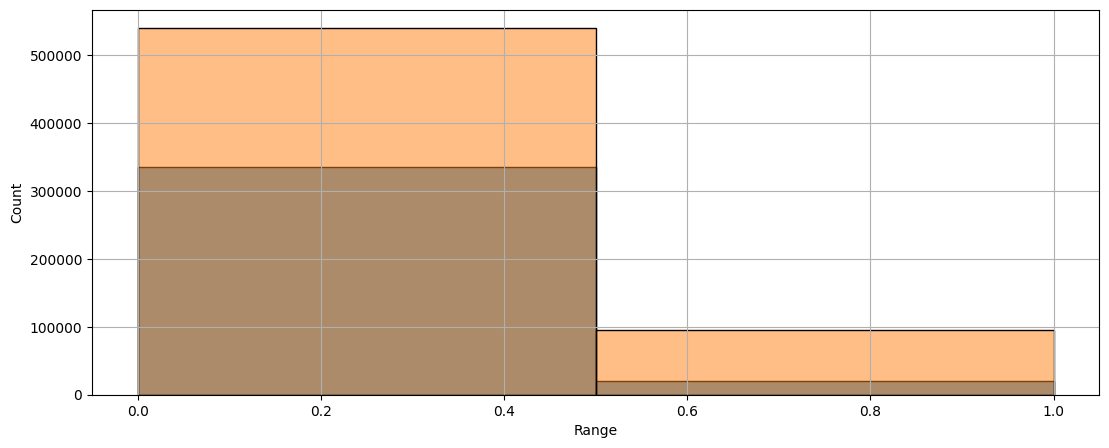

In [58]:
key = "Range"
plt.figure(figsize=(13, 5))
sns.histplot(clean_radar_df[key], bins=2)
sns.histplot(radar_df[key], bins=2, alpha=0.5)
plt.xlabel(key)
plt.grid(grid)
print(len(keys_cnt[key]), len(clean_keys_cnt[key]))
print(*set(keys_cnt[key]))

2 2
0.1000000014901161 0.4000000059604645


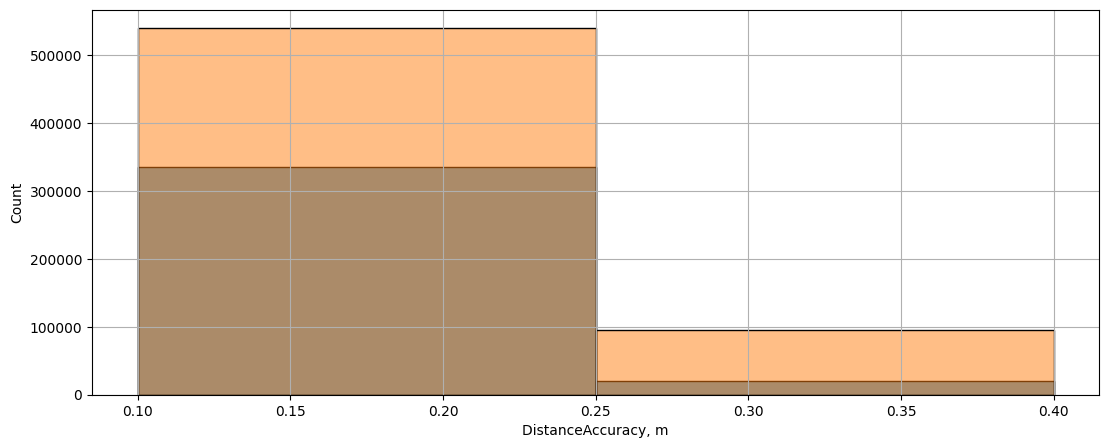

In [80]:
key = "DistanceAccuracy"
plt.figure(figsize=(13, 5))
# plt.subplot(1, 3, 1)
sns.histplot(clean_radar_df[key], bins=2)
sns.histplot(radar_df[key], bins=2, alpha=0.5)
plt.xlabel('DistanceAccuracy, m')
plt.grid(grid)
print(len(keys_cnt[key]), len(clean_keys_cnt[key]))
print(*set(keys_cnt[key]))

89576 77284


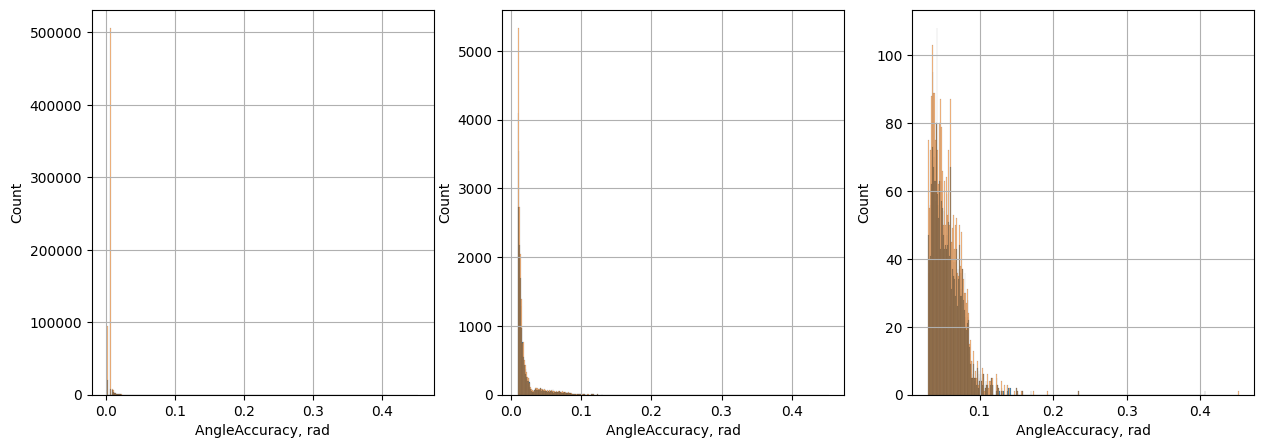

In [81]:
key = "AngleAccuracy"
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(clean_radar_df[key], bins=400)
sns.histplot(radar_df[key], bins=400, alpha=0.5)
plt.xlabel("AngleAccuracy, rad")
plt.grid(grid)
plt.subplot(1, 3, 2)
sns.histplot(clean_radar_df[np.abs(clean_radar_df[key]) > 0.01][key], bins=400)
sns.histplot(radar_df[np.abs(radar_df[key]) > 0.01][key], bins=400, alpha=0.5)
plt.xlabel("AngleAccuracy, rad")
plt.grid(grid)
plt.subplot(1, 3, 3)
sns.histplot(clean_radar_df[np.abs(clean_radar_df[key]) > 0.03][key], bins=400)
sns.histplot(radar_df[np.abs(radar_df[key]) > 0.03][key], bins=400, alpha=0.5)
plt.xlabel("AngleAccuracy, rad")
plt.grid(grid)
print(len(keys_cnt[key]), len(clean_keys_cnt[key]))

7 7
0.0 1.0 2.0 3.0 5.0 6.0 7.0


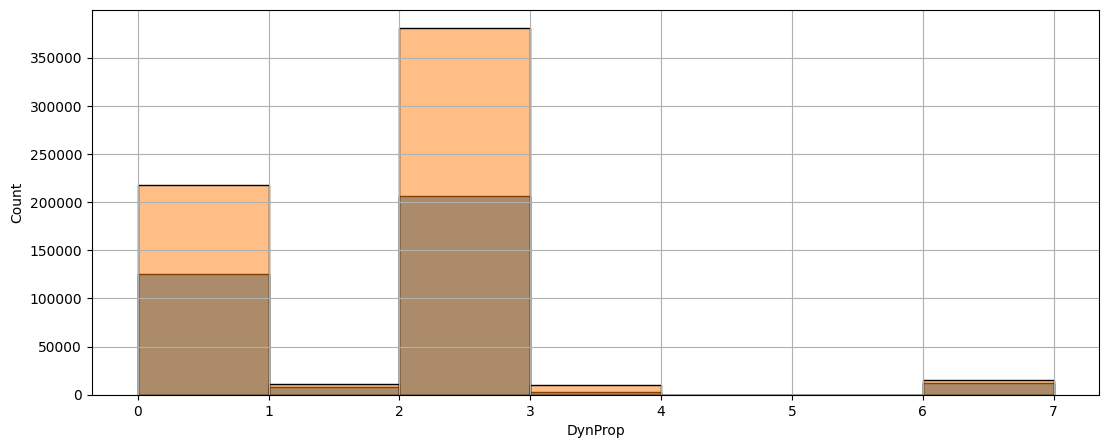

In [61]:
key = "DynProp"
plt.figure(figsize=(13, 5))
sns.histplot(clean_radar_df[key], bins=7)
sns.histplot(radar_df[key], bins=7, alpha=0.5)
plt.xlabel(key)
plt.grid(grid)
print(len(keys_cnt[key]), len(clean_keys_cnt[key]))
print(*set(keys_cnt[key]))

2 1
0.0 1.0


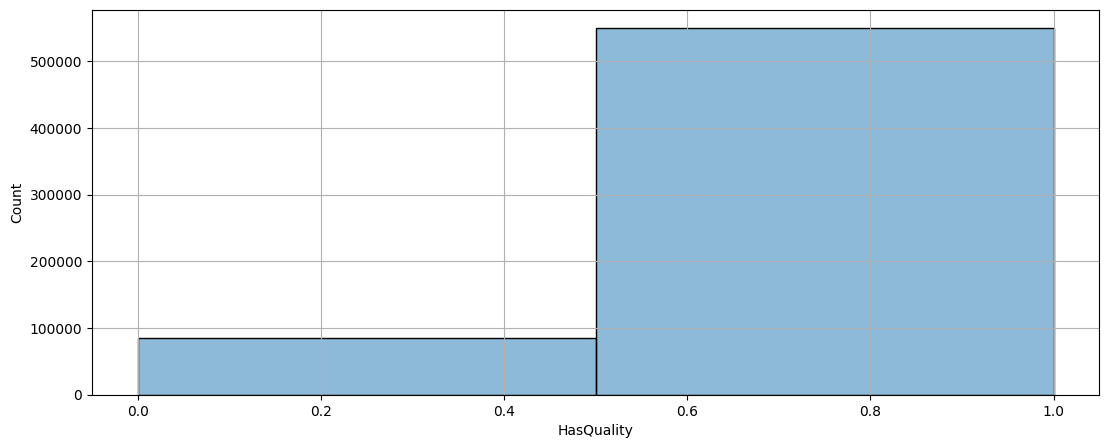

In [62]:
key = "HasQuality"
plt.figure(figsize=(13, 5))
sns.histplot(radar_df[key], bins=2, alpha=0.5)
plt.xlabel(key)
plt.grid(grid)
print(len(keys_cnt[key]), len(clean_keys_cnt[key]))
print(*set(keys_cnt[key]))

1 3
0.75 0.25 0.9990000128746032


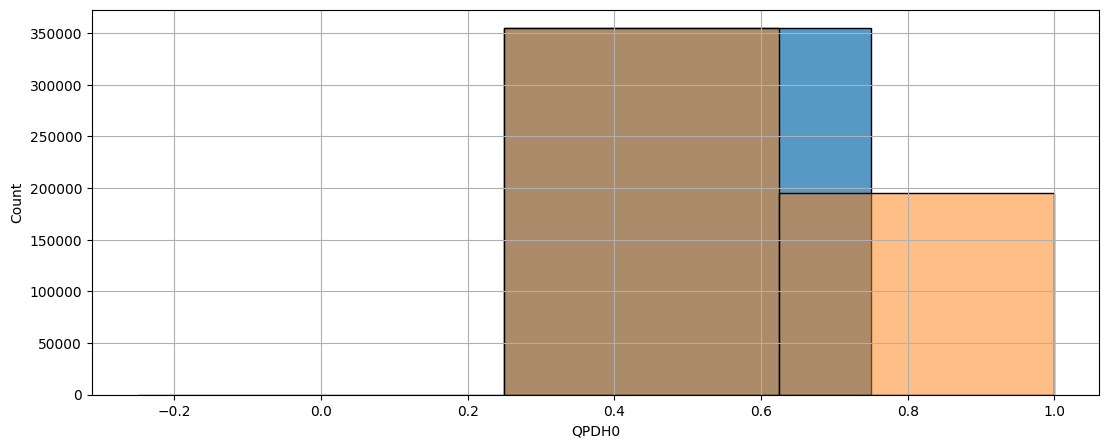

In [63]:
key = "QPDH0"

plt.figure(figsize=(13, 5))
sns.histplot(q_clean_radar_df[key], bins=2)
sns.histplot(q_radar_df[key], bins=2, alpha=0.5)
plt.xlabel(key)
plt.grid(grid)
print(len(q_clean_keys_cnt[key]), len(q_keys_cnt[key]))
print(*set(q_keys_cnt[key]))

10 10
Counter({1.6970000267028809: 99232, 2.187000036239624: 91356, 2.816999912261963: 74345, 1.3170000314712524: 73913, 3.630000114440918: 62027, 1.0230000019073486: 50554, 0.6159999966621399: 40330, 0.7940000295639038: 34549, 4.676000118255615: 20767, 6.025000095367432: 2668})


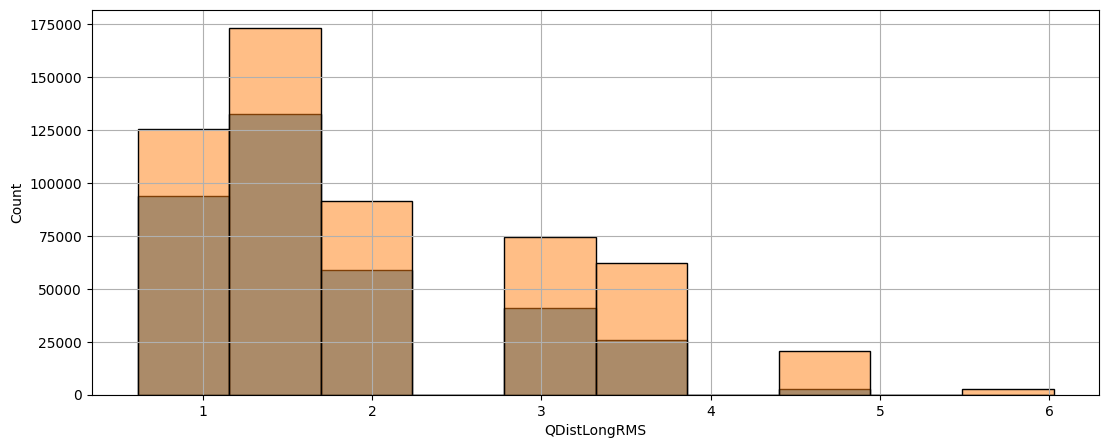

In [64]:
key = "QDistLongRMS"

plt.figure(figsize=(13, 5))
sns.histplot(q_clean_radar_df[key], bins=10)
sns.histplot(q_radar_df[key], bins=10, alpha=0.5)
plt.xlabel(key)
plt.grid(grid)
print(len(q_clean_keys_cnt[key]), len(q_keys_cnt[key]))
print(q_keys_cnt[key])

9 10
Counter({0.7940000295639038: 135727, 1.0230000019073486: 124195, 0.6159999966621399: 102866, 1.3170000314712524: 91806, 1.6970000267028809: 59560, 2.187000036239624: 27010, 2.816999912261963: 6528, 3.630000114440918: 1823, 4.676000118255615: 225, 6.025000095367432: 1})


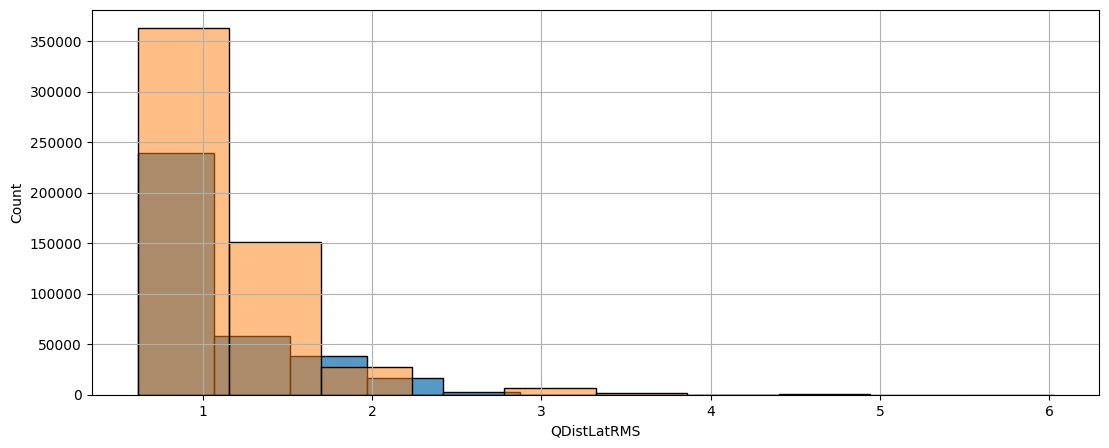

In [65]:
key = "QDistLatRMS"

plt.figure(figsize=(13, 5))
sns.histplot(q_clean_radar_df[key], bins=9)
sns.histplot(q_radar_df[key], bins=10, alpha=0.5)
plt.xlabel(key)
plt.grid(grid)
print(len(q_clean_keys_cnt[key]), len(q_keys_cnt[key]))
print(q_keys_cnt[key])

9 9
Counter({0.2879999876022339: 447654, 0.3709999918937683: 84758, 0.4779999852180481: 13510, 0.6159999966621399: 2767, 0.7940000295639038: 726, 1.0230000019073486: 278, 1.3170000314712524: 42, 1.6970000267028809: 4, 2.187000036239624: 2})


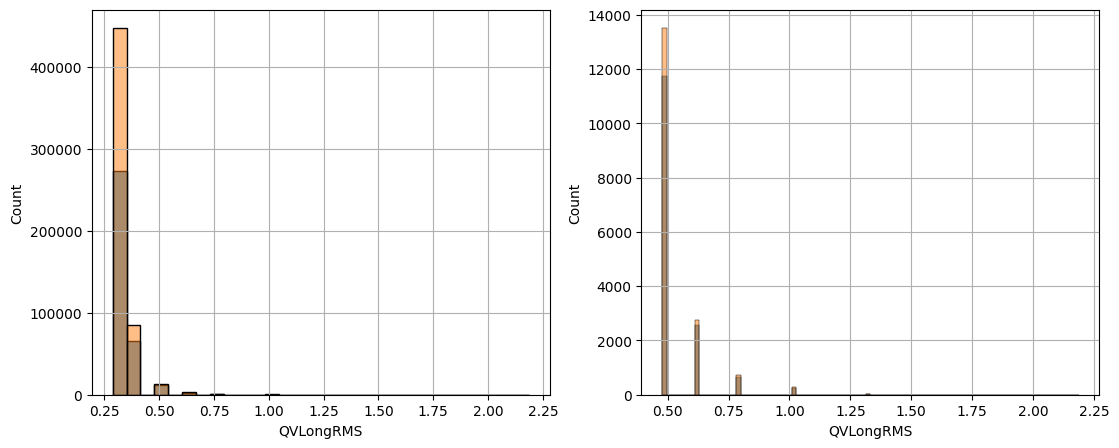

In [66]:
key = "QVLongRMS"

plt.figure(figsize=(13, 5))
plt.subplot(1, 2, 1)
sns.histplot(q_clean_radar_df[key], bins=30)
sns.histplot(q_radar_df[key], bins=30, alpha=0.5)
plt.xlabel(key)
plt.grid(grid)
plt.subplot(1, 2, 2)
sns.histplot(q_clean_radar_df[np.abs(q_clean_radar_df[key]) > 0.38][key], bins=90)
sns.histplot(q_radar_df[key][np.abs(q_radar_df[key]) > 0.38], bins=90, alpha=0.5)
plt.xlabel(key)
plt.grid(grid)
print(len(q_clean_keys_cnt[key]), len(q_keys_cnt[key]))
print(q_keys_cnt[key])

1 1
0.0109999999403953


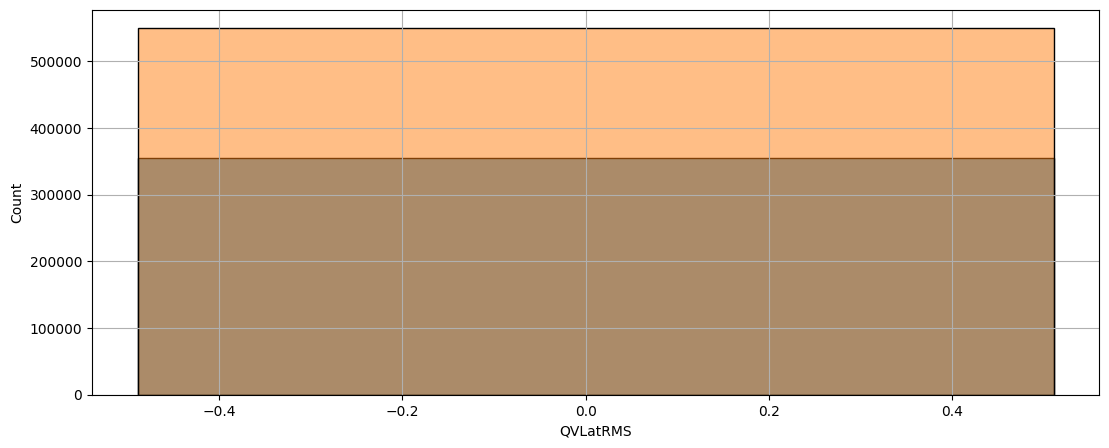

In [67]:
key = "QVLatRMS"

plt.figure(figsize=(13, 5))
sns.histplot(q_clean_radar_df[key], bins=1)
sns.histplot(q_radar_df[key], bins=1, alpha=0.5)
plt.xlabel(key)
plt.grid(grid)
print(len(q_clean_keys_cnt[key]), len(q_keys_cnt[key]))
print(*sorted(set(q_keys_cnt[key])))

3 3
1.0 2.0 3.0


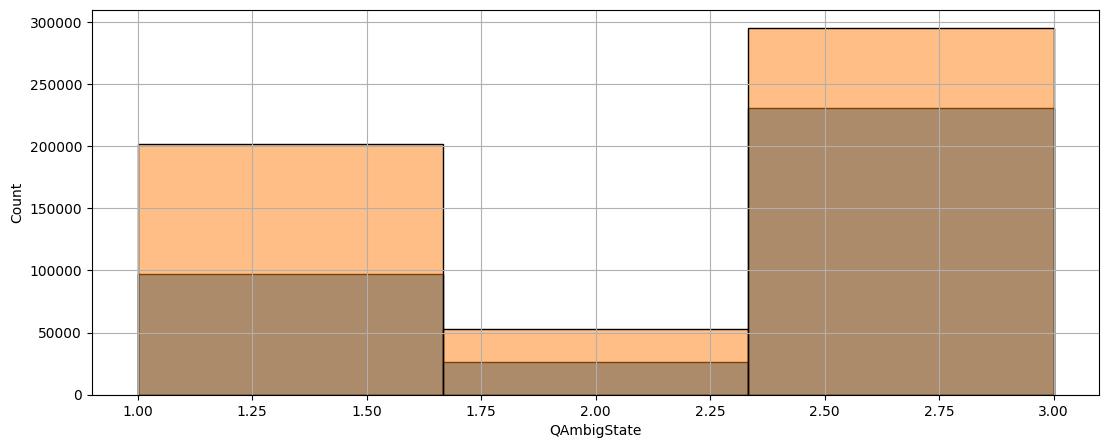

In [68]:
key = "QAmbigState"

plt.figure(figsize=(13, 5))
sns.histplot(q_clean_radar_df[key], bins=3)
sns.histplot(q_radar_df[key], bins=3, alpha=0.5)
plt.xlabel(key)
plt.grid(grid)
print(len(q_clean_keys_cnt[key]), len(q_keys_cnt[key]))
print(*sorted(set(q_keys_cnt[key])))

2         0.0
4         0.0
6         0.0
8         0.0
9         0.0
         ... 
634428    0.0
634429    0.0
634431    0.0
634432    0.0
634433    0.0
Name: QInvalidState, Length: 354882, dtype: float64
1 5
0.0 4.0 8.0 9.0 11.0


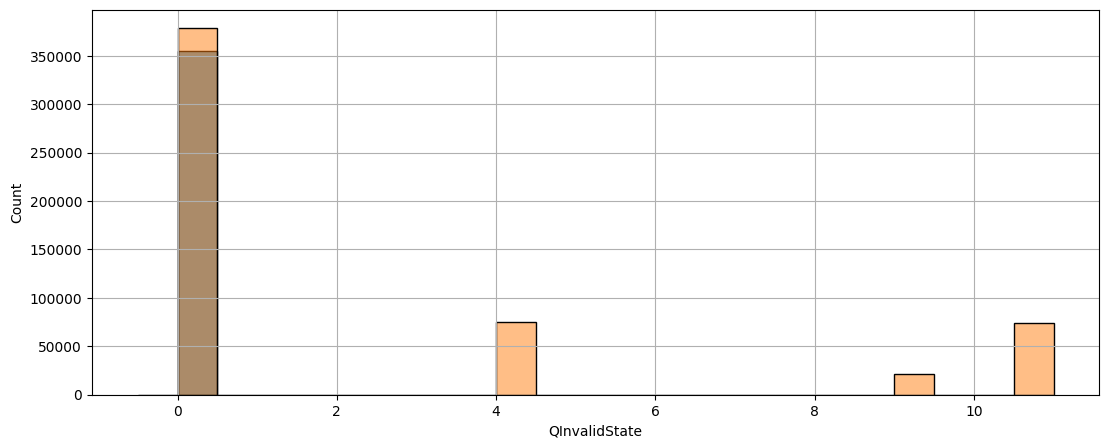

In [69]:
key = "QInvalidState"

plt.figure(figsize=(13, 5))
print(q_clean_radar_df[key])
sns.histplot(q_clean_radar_df[key], bins=2)
sns.histplot(q_radar_df[key], binwidth=0.5, bins=6, alpha=0.5)
plt.xlabel(key)
plt.grid(grid)
print(len(q_clean_keys_cnt[key]), len(q_keys_cnt[key]))
print(*sorted(set(q_keys_cnt[key])))

13364 13370


Text(0.5, 0, 'radar_point_ts - lidar_ts , s')

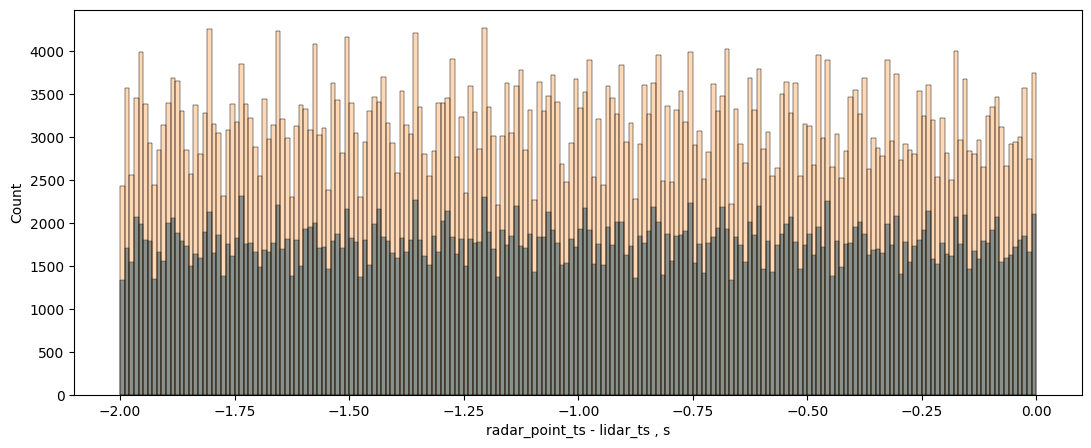

In [83]:
key = "(radar_point_ts - lidar_ts), (s)"
plt.figure(figsize=(13, 5))
sns.histplot(clean_radar_df[key], bins=min(200, len(keys_cnt[key])))
sns.histplot(radar_df[key], bins=min(200, len(keys_cnt[key])), alpha=0.3)
print(len(clean_keys_cnt[key]), len(keys_cnt[key]))
plt.xlabel('radar_point_ts - lidar_ts , s')

5 5
1.0 2.0 3.0 4.0 7.0


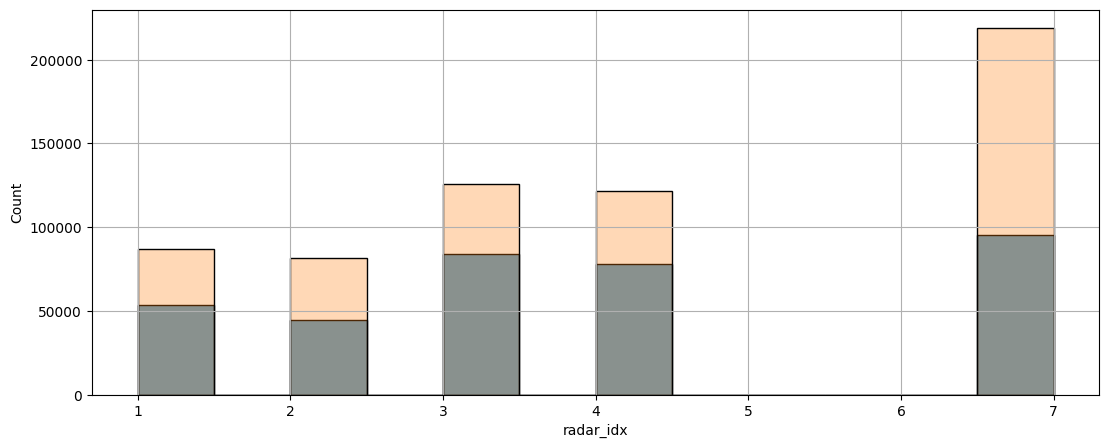

In [71]:
key = "radar_idx"
plt.figure(figsize=(13, 5))
sns.histplot(clean_radar_df[key], binwidth=0.5, bins=min(1000, len(keys_cnt[key])))
sns.histplot(radar_df[key], binwidth=0.5, bins=min(1000, len(keys_cnt[key])), alpha=0.3)
plt.grid(grid)
print(len(clean_keys_cnt[key]), len(keys_cnt[key]))
print(*sorted(set(q_keys_cnt[key])))

X, (m) 634434 633602
Y, (m) 634434 633620
Z, (m) 634434 1


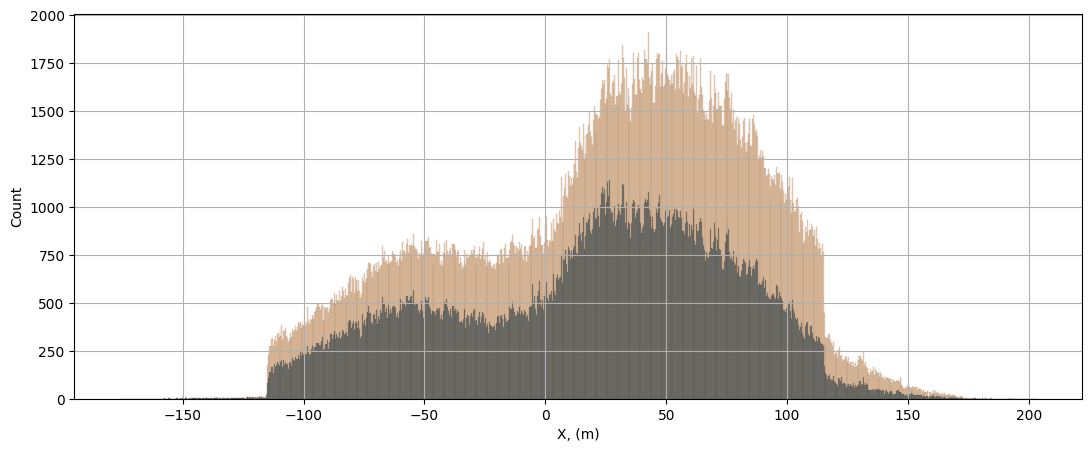

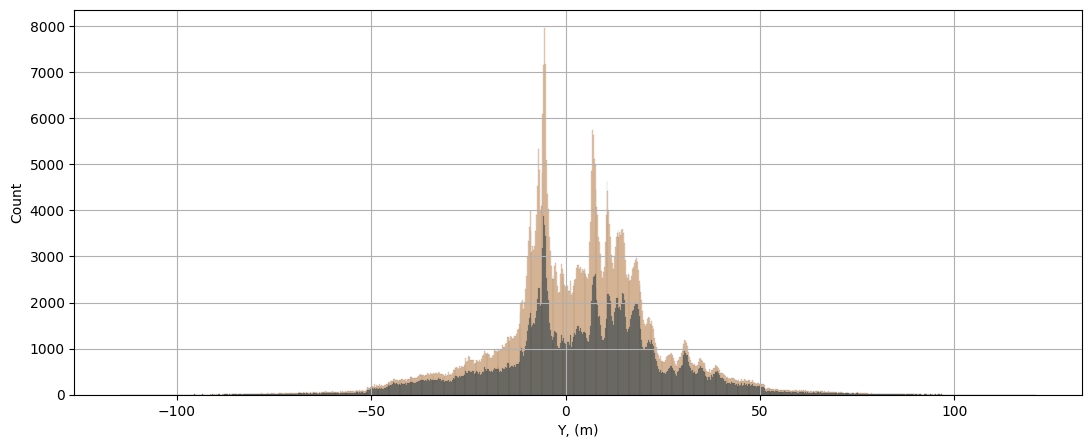

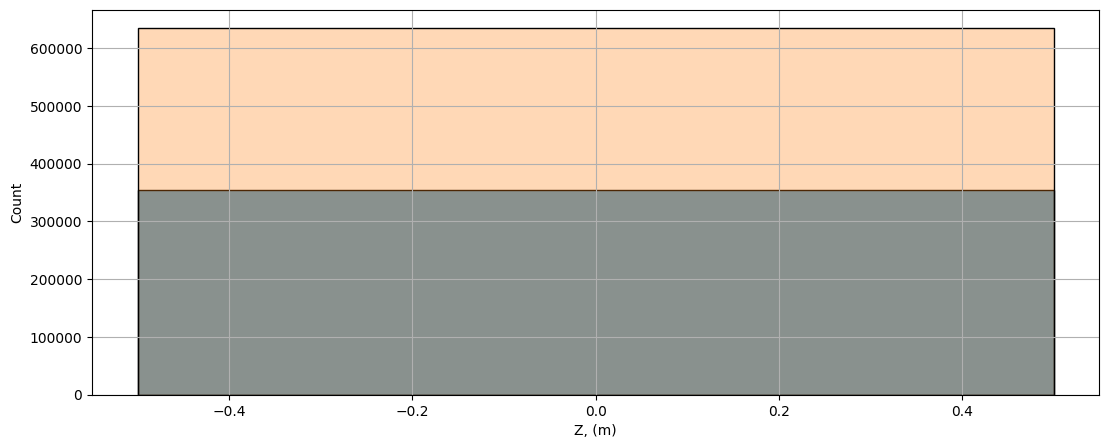

In [72]:
for key in ("X, (m)", "Y, (m)", "Z, (m)"):
    print(key, len(radar_df[key]), len(keys_cnt[key]))
    plt.figure(figsize=(13, 5))
    sns.histplot(clean_radar_df[key], bins=min(1000, len(keys_cnt[key])))
    sns.histplot(radar_df[key], bins=min(1000, len(keys_cnt[key])), alpha=0.3)
    plt.grid(grid)

X, (m) 15955575
Y, (m) 17258193
Z, (m) 17412025
r, (reflectance) 256
lidar_ring 107


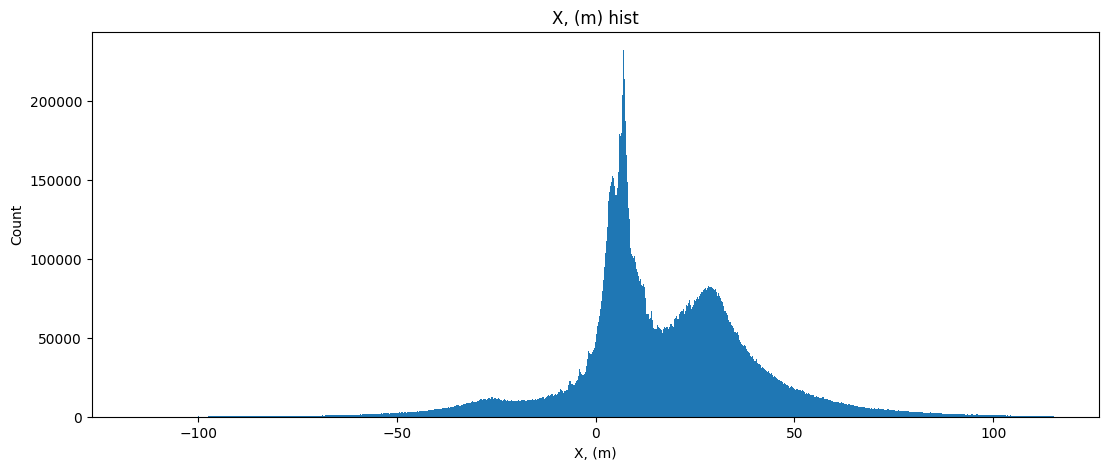

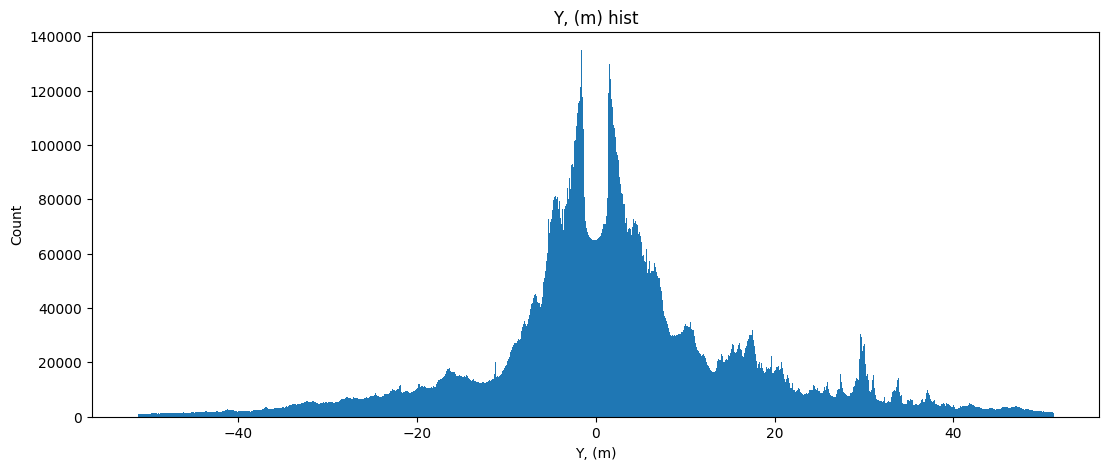

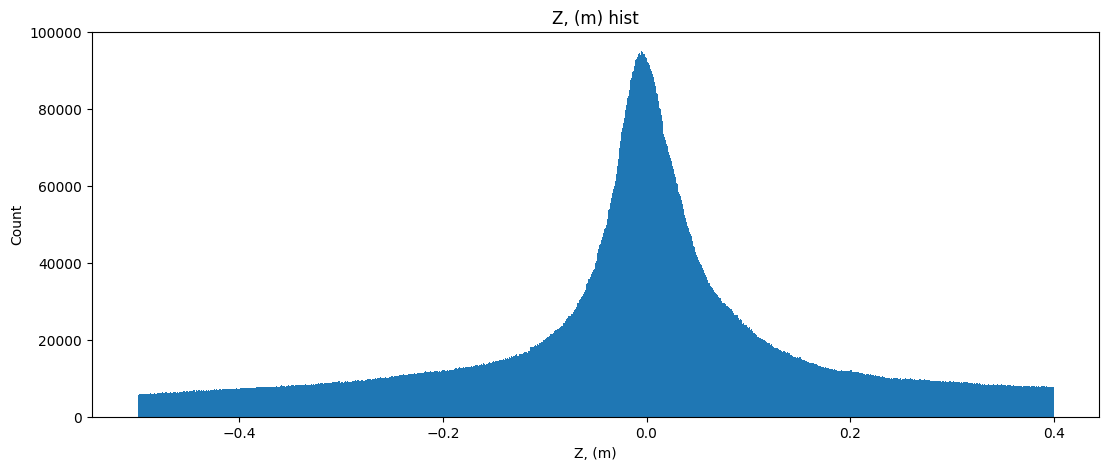

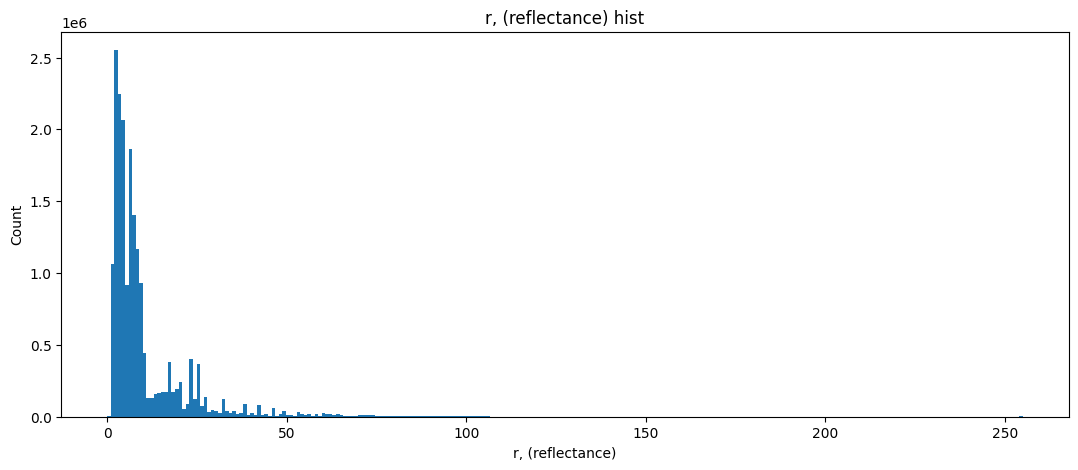

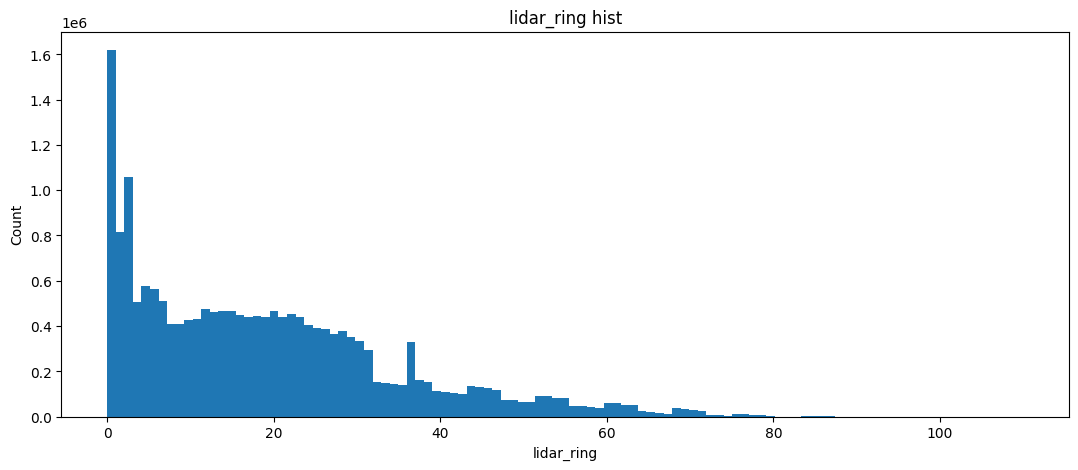

In [84]:
lidar_keys_cnt = {k: Counter(lidar_df[k]) for k in lidar_df.keys()}
for key, val in lidar_keys_cnt.items():
    print(key, len(val))
    plt.figure(figsize=(13, 5))
    plt.hist(lidar_df[key], bins=min(1000, len(val)))
    plt.xlabel(key)
    plt.ylabel("Count")
    plt.title(f"{key} hist")